In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f,pearsonr,spearmanr

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set(font_scale = 2)
sns.set_style("white")
rcParams['svg.fonttype'] = 'none'

In [2]:
variant_info_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/merged.SNVs.NIMH+ADSP_v2.txt"

In [3]:
gosselin_microglia_scores_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/gosselin_microglia_effect_scores_corrected_script.txt"

encode_monocyte_scores_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/encode_monocyte_effect_scores_corrected_script.txt"

fullard_put_neuron_scores_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/fullard_put_neun_effect_scores_corrected_script.txt"

mono_scatac_scores_file = "/home/snigdhaa/diff_acess/tanzi/Archr/tanzi_scores/mono_subset_model_propagation_output.txt"

In [4]:
gosselin_microglia_classifier_scores_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/gosselin_microglia_classifier_effect_scores.txt"

encode_monocyte_classifier_scores_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/encode_monocyte_classifier_effect_scores.txt"

fullard_put_neuron_classifier_scores_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/fullard_put_neun_classifier_effect_scores.txt"


In [5]:
variant_info = pd.read_csv(variant_info_file,
                           sep='\t'
                          )

In [6]:
def readScoresFileAndConcat(scores_files_list,
                            variant_info,
                            names_list):

    colsuffixes = ["effect_score",
                   "ref_score",
                   "alt_score"
                  ]
    
    tables_to_concat = [variant_info]
    
    for i,scores_file in enumerate(scores_files_list):
        colnames = [names_list[i]+"_"+suffix for suffix in colsuffixes]
        scores = pd.read_csv(scores_file,
                             sep='\t',
                             names=colnames
                            )
        tables_to_concat.append(scores)
    
    variant_info = pd.concat(tables_to_concat,
                             axis=1
                            )
    return variant_info

In [7]:
scores_files_list = [gosselin_microglia_scores_file,
                     encode_monocyte_scores_file,
                     fullard_put_neuron_scores_file,
                     mono_scatac_scores_file,
                     gosselin_microglia_classifier_scores_file,
                     encode_monocyte_classifier_scores_file,
                     fullard_put_neuron_classifier_scores_file
                    ]
names_list = ["Microglia",
              "Monocyte",
              "Neuron",
              "mono_scatac",
              "Microglia_classifier",
              "Monocyte_classifier",
              "Neuron_classifier"
             ]

variant_info = readScoresFileAndConcat(scores_files_list,
                                       variant_info,
                                       names_list
                                      )

In [8]:
variant_info["Microglia_effect_score_normed"] = variant_info["Microglia_effect_score"]/np.std(variant_info["Microglia_effect_score"])
variant_info["Monocyte_effect_score_normed"] = variant_info["Monocyte_effect_score"]/np.std(variant_info["Monocyte_effect_score"])
variant_info["Neuron_effect_score_normed"] = variant_info["Neuron_effect_score"]/np.std(variant_info["Neuron_effect_score"])
variant_info["mono_scatac_effect_score_normed"] = variant_info["mono_scatac_effect_score"]/np.std(variant_info["mono_scatac_effect_score"])
variant_info["Microglia_classifier_effect_score_normed"] = np.ma.masked_invalid(variant_info["Microglia_classifier_effect_score"]/np.std(np.ma.masked_invalid(variant_info["Microglia_classifier_effect_score"])))
variant_info["Monocyte_classifier_effect_score_normed"] = np.ma.masked_invalid(variant_info["Monocyte_classifier_effect_score"]/np.std(np.ma.masked_invalid(variant_info["Monocyte_classifier_effect_score"])))
variant_info["Neuron_classifier_effect_score_normed"] = np.ma.masked_invalid(variant_info["Neuron_classifier_effect_score"]/np.std(np.ma.masked_invalid(variant_info["Neuron_classifier_effect_score"])))

In [9]:
print(np.std(np.ma.masked_invalid(variant_info["Microglia_classifier_effect_score"])))
print(np.std(np.ma.masked_invalid(variant_info["Monocyte_classifier_effect_score"])))
print(np.std(np.ma.masked_invalid(variant_info["Neuron_classifier_effect_score"])))

0.8076274339308626
0.7420058617583285
0.5717854982368228


In [10]:
print(np.std(np.ma.masked_invalid(variant_info["Microglia_effect_score"])))
print(np.std(np.ma.masked_invalid(variant_info["Monocyte_effect_score"])))
print(np.std(np.ma.masked_invalid(variant_info["Neuron_effect_score"])))

0.7650310751838659
0.3649165102945938
0.45233007672390074


In [11]:
print(np.std(variant_info["Microglia_effect_score"]))
print(np.std(variant_info["Monocyte_effect_score"]))
print(np.std(variant_info["Neuron_effect_score"]))

0.7650310751838659
0.3649165102945938
0.45233007672390074


In [12]:
variant_info.head()

,CHROM,POS,ID,rsid,REF,ALT,AF.nimh,AN.nimh,AF.adsp_fams,AN.adsp_fams,...,Neuron_classifier_effect_score,Neuron_classifier_ref_score,Neuron_classifier_alt_score,Microglia_effect_score_normed,Monocyte_effect_score_normed,Neuron_effect_score_normed,mono_scatac_effect_score_normed,Microglia_classifier_effect_score_normed,Monocyte_classifier_effect_score_normed,Neuron_classifier_effect_score_normed
0,1,10177,chr1:10177:A:C,rs201752861,A,C,0.013000,1262.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10250,chr1:10250:A:C,rs199706086,A,C,0.028000,2786.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,10257,chr1:10257:A:C,rs111200574,A,C,0.003047,2786.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,10291,chr1:10291:C:T,rs145427775,C,T,0.008802,2786.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,10327,chr1:10327:T:C,rs112750067,T,C,0.208000,2786.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


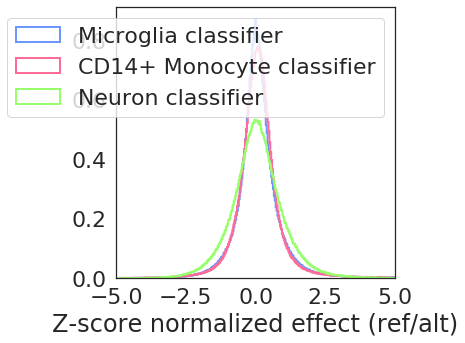

In [13]:
plt.figure(figsize=(5,5))
plt.hist(variant_info["Microglia_classifier_effect_score_normed"].replace([np.inf, -np.inf], np.nan),
         density=True,
         bins=1000,
         color='#6b97ff',
         histtype='step',
         label='Microglia classifier',
         linewidth=2
        )


plt.hist(variant_info["Monocyte_classifier_effect_score_normed"].replace([np.inf, -np.inf], np.nan),
         density=True,
         bins=1000,
         color='#ff6b97',
         histtype='step',
         label='CD14+ Monocyte classifier',
         linewidth=2
        )
plt.hist(variant_info["Neuron_classifier_effect_score_normed"].replace([np.inf, -np.inf], np.nan),
         density=True,
         bins=1000,
         color='#97ff6b',
         histtype='step',
         label='Neuron classifier',
         linewidth=2
        )
        
plt.xlim([-5,5])
plt.xlabel("Z-score normalized effect (ref/alt)")
plt.legend()
plt.savefig("bulk_classifier_model_score_distributions_corrected_script.svg")

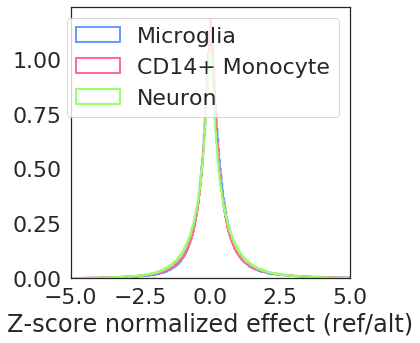

In [14]:
plt.figure(figsize=(5,5))
plt.hist(variant_info["Microglia_effect_score_normed"],
         density=True,
         bins=1000,
         color='#6b97ff',
         histtype='step',
         label='Microglia',
         linewidth=2
        )
plt.hist(variant_info["Monocyte_effect_score_normed"],
         density=True,
         bins=1000,
         color='#ff6b97',
         histtype='step',
         label='CD14+ Monocyte',
         linewidth=2
        )
plt.hist(variant_info["Neuron_effect_score_normed"],
         density=True,
         bins=1000,
         color='#97ff6b',
         histtype='step',
         label='Neuron',
         linewidth=2
        )
plt.xlim([-5,5])
plt.xlabel("Z-score normalized effect (ref/alt)")
plt.legend()
plt.savefig("bulk_model_score_distributions_corrected_script.svg")

In [15]:
def scatterPlotCellTypePairs(effect_scores_pair_dropna, ct1_name, ct2_name):    
    p = sns.jointplot(x=effect_scores_pair_dropna[ct1_name+"_"+"effect_score_normed"],
                      y=effect_scores_pair_dropna[ct2_name+"_"+"effect_score_normed"],
                      kind='hex',
                      color='red',
                      gridsize=2500,
                      rasterized=True
                     )
    p.ax_marg_x.remove()
    p.ax_marg_y.remove()
    
    '''
    r, rp = pearsonr(effect_scores_pair_dropna[ct1_name+"_"+"effect_score_normed"],
                     effect_scores_pair_dropna[ct2_name+"_"+"effect_score_normed"])
    rho, rhop = spearmanr(effect_scores_pair_dropna[ct1_name+"_"+"effect_score_normed"],
                          effect_scores_pair_dropna[ct2_name+"_"+"effect_score_normed"])
    '''
    p.set_axis_labels(ct1_name, ct2_name)
    '''
    p.ax_joint.annotate("r={:0.2}, p={:0.2}".format(r,rp)+ "\n" + r"$\rho$={:0.2}, p={:0.2}".format(rho, rhop),
                        xy=(0.5,0.1),
                        xycoords="axes fraction",
                        ha="left",
                        va="center",
                        bbox={'fc': 'none', 'ec': 'none'},
                        color='red',
                        fontsize=15,
                        weight='bold'
                       )
    '''
    plt.xlim([-3,3])
    plt.ylim([-3,3])
    plt.savefig("_".join([ct1_name,ct2_name,"variant","scores","comparison"])+".svg")

In [ ]:
variant_info.loc["rs76726049"]

In [ ]:
ct1_name = "Monocyte"
ct2_name = "Monocyte_classifier"

effect_scores_pair_dropna_inf = variant_info[[ct1_name+"_"+"effect_score_normed",
                                       ct2_name+"_"+"effect_score_normed"
                                      ]].replace([np.inf,-np.inf], np.nan).dropna()

scatterPlotCellTypePairs(effect_scores_pair_dropna_inf,
                         ct1_name,
                         ct2_name
                        )

In [ ]:
ct1_name = "mono_scatac"
ct2_name = "Monocyte"

scatterPlotCellTypePairs(variant_info[[ct1_name+"_"+"effect_score_normed",
                                       ct2_name+"_"+"effect_score_normed"
                                      ]].dropna(),
                         ct1_name,
                         ct2_name
                        )

In [ ]:
ct1_name = "mono_scatac"
ct2_name = "Monocyte_classifier"

scatterPlotCellTypePairs(variant_info[[ct1_name+"_"+"effect_score_normed",
                                       ct2_name+"_"+"effect_score_normed"
                                      ]].replace([np.inf, -np.inf], np.nan).dropna(),
                         ct1_name,
                         ct2_name
                        )

In [ ]:
ct1_name = "Monocyte"
ct2_name = "Microglia"

scatterPlotCellTypePairs(variant_info[[ct1_name+"_"+"effect_score_normed",
                                       ct2_name+"_"+"effect_score_normed"
                                      ]].dropna(),
                         ct1_name,
                         ct2_name
                        )

/home/eramamur/bin/miniconda3/envs/data_analysis/lib/python3.7/site-packages/seaborn/axisgrid.py:1629: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


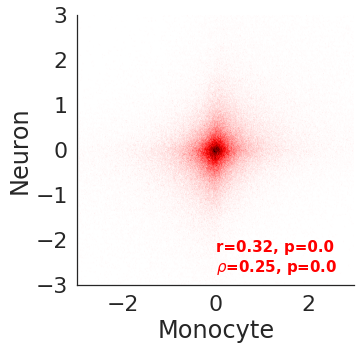

In [30]:
ct1_name = "Monocyte"
ct2_name = "Neuron"

scatterPlotCellTypePairs(variant_info[[ct1_name+"_"+"effect_score_normed",
                                       ct2_name+"_"+"effect_score_normed"
                                      ]].dropna(),
                         ct1_name,
                         ct2_name
                        )

/home/eramamur/bin/miniconda3/envs/data_analysis/lib/python3.7/site-packages/seaborn/axisgrid.py:1629: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


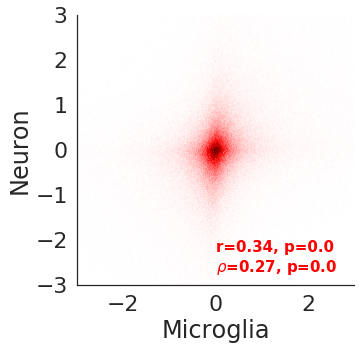

In [31]:
ct1_name = "Microglia"
ct2_name = "Neuron"

scatterPlotCellTypePairs(variant_info[[ct1_name+"_"+"effect_score_normed",
                                       ct2_name+"_"+"effect_score_normed"
                                      ]].dropna(),
                         ct1_name,
                         ct2_name
                        )

In [16]:
variant_info.columns

Index(['CHROM', 'POS', 'ID', 'rsid', 'REF', 'ALT', 'AF.nimh', 'AN.nimh',
       'AF.adsp_fams', 'AN.adsp_fams', 'AF.adsp_cc', 'AN.adsp_cc',
       'Microglia_effect_score', 'Microglia_ref_score', 'Microglia_alt_score',
       'Monocyte_effect_score', 'Monocyte_ref_score', 'Monocyte_alt_score',
       'Neuron_effect_score', 'Neuron_ref_score', 'Neuron_alt_score',
       'Microglia_effect_score_normed', 'Monocyte_effect_score_normed',
       'Neuron_effect_score_normed'],
      dtype='object')

In [17]:
def plotRareAndCommonVariantScoreHistogramsAndConductFTest(rare_variant_info,
                                                          common_variant_info,
                                                          ct_name,
                                                          cohort_name):
    plt.figure(figsize=(9,5))
    plt.hist(rare_variant_info[ct_name+"_"+"effect_score_normed"],
             density=True,
             bins=1000,
             color='red',
             histtype='step',
             label='Rare ' + cohort_name
            )
    plt.hist(common_variant_info[ct_name+"_"+"effect_score_normed"],
             density=True,
             bins=1000,
             color='blue',
             histtype='step',
             label='Common ' + cohort_name
            )

    plt.xlim([-5,5])
    plt.xlabel("Z-score normalized effect"+" "+ct_name+" "+"(ref/alt)")
    plt.legend()
    plt.show()

    rare_variant_variance = np.var(rare_variant_info[ct_name+"_"+"effect_score_normed"],
                                                              ddof=1)
    common_variant_variance = np.var(common_variant_info[ct_name+"_"+"effect_score_normed"],
                                                              ddof=1)
    df1 = rare_variant_info.shape[0]-1
    df2 = common_variant_info.shape[0]-1
    F = rare_variant_variance/common_variant_variance
    print(F)
    print(f.sf(F,df1,df2))

In [18]:
rare_variant_freq_cutoff = 0.01
common_variant_freq_cutoff = 0.05

In [19]:
nimh_rare_variant_info = variant_info.loc[(variant_info["AF.nimh"]<=rare_variant_freq_cutoff) | 
                                          (variant_info["AF.nimh"]>=1-rare_variant_freq_cutoff)
                                         ]
nimh_common_variant_info = variant_info.loc[(variant_info["AF.nimh"]>=common_variant_freq_cutoff) & 
                                            (variant_info["AF.nimh"]<=1-common_variant_freq_cutoff)
                                           ]

In [20]:
adsp_rare_variant_info = variant_info.loc[(variant_info["AF.adsp_fams"]<=rare_variant_freq_cutoff) | 
                                          (variant_info["AF.adsp_fams"]>=1-rare_variant_freq_cutoff)
                                         ]
adsp_common_variant_info = variant_info.loc[(variant_info["AF.adsp_fams"]>=common_variant_freq_cutoff) & 
                                            (variant_info["AF.adsp_fams"]<=1-common_variant_freq_cutoff)
                                           ]

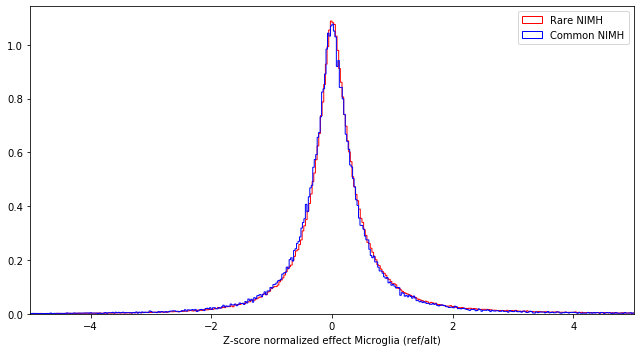

1.0130678255928076
1.8966381244275173e-116


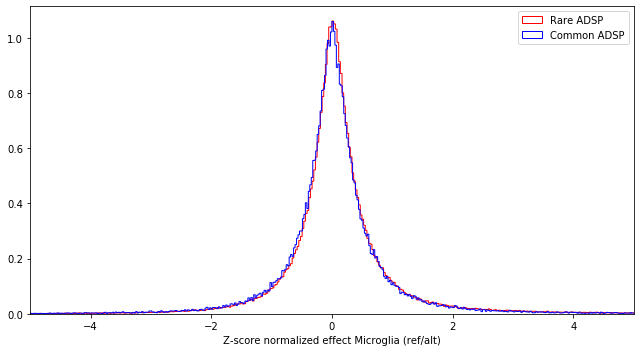

1.005427093314056
1.286064120202881e-16


In [21]:
plotRareAndCommonVariantScoreHistogramsAndConductFTest(nimh_rare_variant_info,
                                                       nimh_common_variant_info,
                                                       "Microglia",
                                                       "NIMH")
plotRareAndCommonVariantScoreHistogramsAndConductFTest(adsp_rare_variant_info,
                                                       adsp_common_variant_info,
                                                       "Microglia",
                                                       "ADSP")

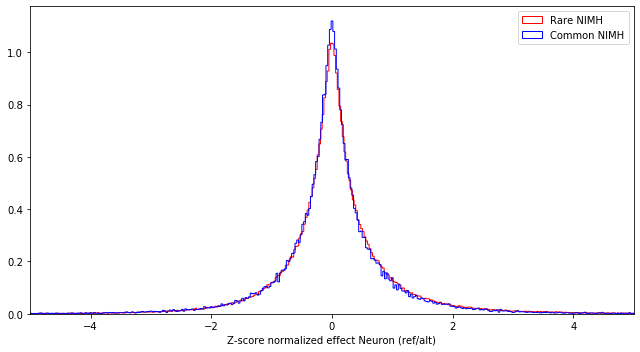

1.08462582943549
0.0


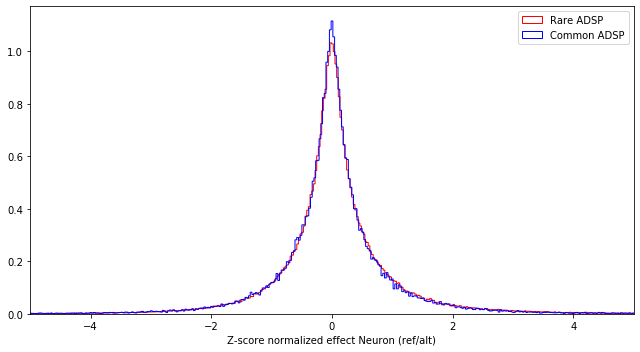

1.0731434212730122
0.0


In [22]:
plotRareAndCommonVariantScoreHistogramsAndConductFTest(nimh_rare_variant_info,
                                                       nimh_common_variant_info,
                                                       "Neuron",
                                                       "NIMH")
plotRareAndCommonVariantScoreHistogramsAndConductFTest(adsp_rare_variant_info,
                                                       adsp_common_variant_info,
                                                       "Neuron",
                                                       "ADSP")

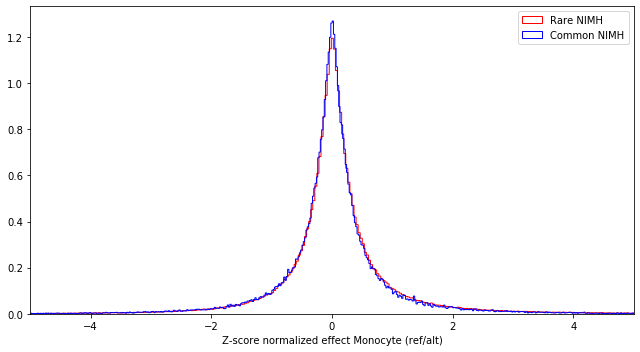

1.1287918120918308
0.0


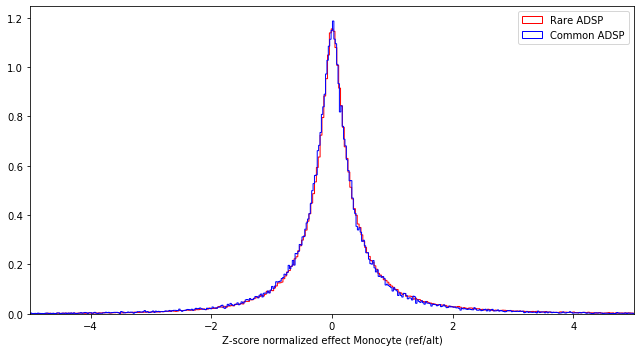

1.084190107423364
0.0


In [23]:
plotRareAndCommonVariantScoreHistogramsAndConductFTest(nimh_rare_variant_info,
                                                       nimh_common_variant_info,
                                                       "Monocyte",
                                                       "NIMH")
plotRareAndCommonVariantScoreHistogramsAndConductFTest(adsp_rare_variant_info,
                                                       adsp_common_variant_info,
                                                       "Monocyte",
                                                       "ADSP")

In [24]:
nimh_common_variant_info = None
nimh_rare_variant_info = None
adsp_common_variant_info = None
adsp_rare_variant_info = None

In [25]:
variant_info.columns

Index(['CHROM', 'POS', 'ID', 'rsid', 'REF', 'ALT', 'AF.nimh', 'AN.nimh',
       'AF.adsp_fams', 'AN.adsp_fams', 'AF.adsp_cc', 'AN.adsp_cc',
       'Microglia_effect_score', 'Microglia_ref_score', 'Microglia_alt_score',
       'Monocyte_effect_score', 'Monocyte_ref_score', 'Monocyte_alt_score',
       'Neuron_effect_score', 'Neuron_ref_score', 'Neuron_alt_score',
       'Microglia_effect_score_normed', 'Monocyte_effect_score_normed',
       'Neuron_effect_score_normed'],
      dtype='object')

In [26]:
variant_info.to_csv("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/merged.SNVs.NIMH+ADSP_v2_bulk_models_scores.txt",
                   sep='\t',
                   na_rep="nan")

In [27]:
variant_info.sort_values(by="Monocyte_effect_score",
                        inplace=True)

In [28]:
variant_info.head()

,CHROM,POS,ID,rsid,REF,ALT,AF.nimh,AN.nimh,AF.adsp_fams,AN.adsp_fams,...,Microglia_alt_score,Monocyte_effect_score,Monocyte_ref_score,Monocyte_alt_score,Neuron_effect_score,Neuron_ref_score,Neuron_alt_score,Microglia_effect_score_normed,Monocyte_effect_score_normed,Neuron_effect_score_normed
4866007,2,99337196,chr2:99337196:C:T,rs1008006300,C,T,0.000677,2786.0,NaN,NaN,...,17.226564,-6.366488,6.764430,13.130918,-1.432091,8.083450,9.515541,-8.108225,-17.446424,-3.166030
65265895,4,2962864,chr4:2962864:C:G,rs1256966147,C,G,NaN,NaN,NaN,NaN,...,11.972161,-5.464151,5.246871,10.711022,NaN,NaN,NaN,-5.375895,-14.973703,NaN
43164092,1,246932299,chr1:246932299:G:A,rs530473003,G,A,NaN,NaN,0.000209,1684.0,...,16.513403,-5.351658,6.093564,11.445222,-1.711742,11.626618,13.338361,-6.570569,-14.665432,-3.784277
16041073,6,27687697,chr6:27687697:A:C,rs1036852496,A,C,0.000678,2786.0,NaN,NaN,...,22.617780,-5.273289,5.475403,10.748693,-1.775166,5.957899,7.733065,-4.707492,-14.450673,-3.924492
97422271,17,75940938,chr17:75940938:G:A,rs543118951,G,A,NaN,NaN,NaN,NaN,...,11.172060,-5.248535,8.044537,13.293072,NaN,NaN,NaN,-2.354946,-14.382838,NaN


In [29]:
snigdha_snp_list_unique_scores_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/common_variants/snigdha_snp_list_unique_haploreg_hg19_positions_1kb_and_500bp_sequences_microglia_monocyte_neuron_bulk_scores.txt"

In [30]:
snigdha_snp_list_unique_scores = pd.read_csv(snigdha_snp_list_unique_scores_file,
                                            sep='\t')

In [31]:
snigdha_snp_list_unique_scores_merged = snigdha_snp_list_unique_scores.merge(variant_info,
                                     how='inner',
                                     left_on="LD_RSID",
                                     right_on="rsid",
                                     suffixes=('_ad', '_tanzi')
                                    )

In [32]:
snigdha_snp_list_unique_scores_merged.loc[snigdha_snp_list_unique_scores_merged.Monocyte_effect_score.abs()>=2*np.std(variant_info.Monocyte_effect_score)][["LD_RSID","REF_ad","ALT_ad","REF_tanzi","ALT_tanzi","Microglia_effect_score","Monocyte_effect_score","Neuron_effect_score"]]

,LD_RSID,REF_ad,ALT_ad,REF_tanzi,ALT_tanzi,Microglia_effect_score,Monocyte_effect_score,Neuron_effect_score
167,rs636317,C,T,C,T,7.776990,2.300269,NaN
416,rs1010322,C,G,C,G,0.754095,1.288740,NaN
519,rs2526377,A,G,A,G,0.916309,1.421061,NaN
536,rs76726049,T,C,T,C,NaN,0.850300,NaN
829,rs9270921,C,T,C,T,NaN,1.199633,NaN
960,rs9271182,A,G,A,G,NaN,-2.211533,NaN
1104,rs28834970,T,C,T,C,NaN,-1.287054,NaN


In [33]:
snigdha_snp_list_unique_scores_merged.loc[snigdha_snp_list_unique_scores_merged.Microglia_effect_score.abs()>=2*np.std(variant_info.Microglia_effect_score)][["LD_RSID","REF_ad","ALT_ad","REF_tanzi","ALT_tanzi","Microglia_effect_score","Monocyte_effect_score","Neuron_effect_score"]]

,LD_RSID,REF_ad,ALT_ad,REF_tanzi,ALT_tanzi,Microglia_effect_score,Monocyte_effect_score,Neuron_effect_score
167,rs636317,C,T,C,T,7.776990,2.300269,NaN
584,rs6064392,G,T,G,T,2.860759,0.555648,NaN
947,rs9271162,G,T,G,T,1.611466,0.139353,-0.57666


In [34]:
snigdha_snp_list_unique_scores_merged.loc[snigdha_snp_list_unique_scores_merged.Neuron_effect_score.abs()>=2*np.std(variant_info.Neuron_effect_score)][["LD_RSID","REF_ad","ALT_ad","REF_tanzi","ALT_tanzi","Microglia_effect_score","Monocyte_effect_score","Neuron_effect_score"]]

,LD_RSID,REF_ad,ALT_ad,REF_tanzi,ALT_tanzi,Microglia_effect_score,Monocyte_effect_score,Neuron_effect_score
373,rs395601,G,C,G,C,0.206289,0.102525,-1.125025
